In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import string
import re
import nltk
import nltk.corpus
nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")
from nltk.stem import WordNetLemmatizer
from sklearn.metrics import roc_curve, auc,roc_auc_score
from sklearn.preprocessing import label_binarize

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\62451\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\62451\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\62451\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
df = pd.read_excel('energy drink.xlsx')

In [4]:
!pip install wordcloud

In [5]:
# Text Polarity
from textblob import TextBlob

# Text Vectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Word Cloud
from wordcloud import WordCloud

In [6]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder

# TF-IDF Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Resampling
from imblearn.over_sampling import SMOTE
from collections import Counter

# Splitting Dataset
from sklearn.model_selection import train_test_split

In [7]:
# Model Building
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

# Model Metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [8]:
df.shape

(17494, 5)

In [9]:
df

,ProfileName,Score,Summary,Time,Text
0,timesesque,5,The sparkling versions are fantastic,2018-03-11 00:00:00,Celsius energy drinks are the only energy drin...
1,Seaside Designer,5,Replaces Adderall for ADD,2018-05-14 00:00:00,I heard celebs on the tellie talking about thi...
2,Natascha Atsatt,1,Very dangerous drink,2020-07-13 00:00:00,Very dangerous product to someone who is sensi...
3,Mark,5,I drink one or two Redbulls every day. Now ...,2017-11-17 00:00:00,I drink one or two Redbulls every day. Now tha...
4,olivia spanos,5,Great taste lots of kick!!!,2018-05-03 00:00:00,This is my favourite!!! Taste is crisp and has...
...,...,...,...,...,...
17489,Heather Van Dyne,5,Love this sugar free POG!!!! Yum!!,2022-04-07 00:00:00,The only sugar free POG drink I can find- and ...
17490,John J.,5,Got it Right,2022-04-03 00:00:00,I got the right product this time
17491,The KruzM,5,"It's rock star, Not as good as red bull to get...",2021-04-05 00:00:00,"It's good, 3 or 4 cans later it actually works."
17492,Erica,5,Still cheaper than the store,2022-04-13 00:00:00,Still best value for half a case. I'm an avid ...


In [10]:
df.Text.fillna(value = "", inplace = True)

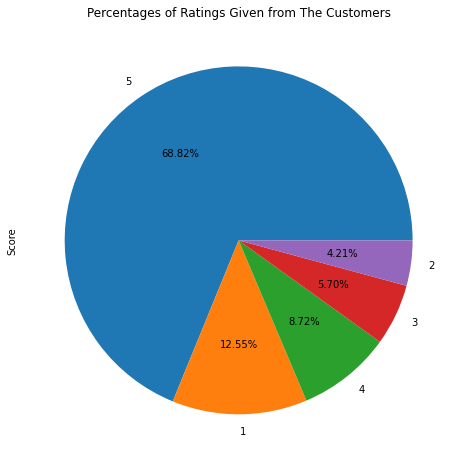

In [11]:
df['Score'].value_counts().plot(kind = "pie", legend = False, autopct = "%1.2f%%", fontsize = 10, figsize=(8,8))
plt.title("Percentages of Ratings Given from The Customers", loc = "center")
plt.show()

In [12]:
def Labelling(Rows):
    if(Rows["Score"] > 3.0):
        Label = "Positive"
    elif(Rows["Score"] < 3.0):
        Label = "Negative"
    else:
        Label = "Neutral"
    return Label

In [13]:
df

,ProfileName,Score,Summary,Time,Text
0,timesesque,5,The sparkling versions are fantastic,2018-03-11 00:00:00,Celsius energy drinks are the only energy drin...
1,Seaside Designer,5,Replaces Adderall for ADD,2018-05-14 00:00:00,I heard celebs on the tellie talking about thi...
2,Natascha Atsatt,1,Very dangerous drink,2020-07-13 00:00:00,Very dangerous product to someone who is sensi...
3,Mark,5,I drink one or two Redbulls every day. Now ...,2017-11-17 00:00:00,I drink one or two Redbulls every day. Now tha...
4,olivia spanos,5,Great taste lots of kick!!!,2018-05-03 00:00:00,This is my favourite!!! Taste is crisp and has...
...,...,...,...,...,...
17489,Heather Van Dyne,5,Love this sugar free POG!!!! Yum!!,2022-04-07 00:00:00,The only sugar free POG drink I can find- and ...
17490,John J.,5,Got it Right,2022-04-03 00:00:00,I got the right product this time
17491,The KruzM,5,"It's rock star, Not as good as red bull to get...",2021-04-05 00:00:00,"It's good, 3 or 4 cans later it actually works."
17492,Erica,5,Still cheaper than the store,2022-04-13 00:00:00,Still best value for half a case. I'm an avid ...


In [14]:
df["sentiment"] = df.apply(Labelling, axis = 1)

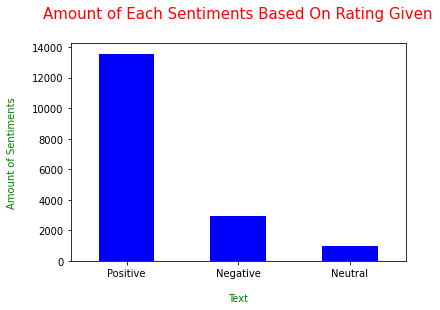

In [15]:
df["sentiment"].value_counts().plot(kind = "bar", color = "blue")
plt.title("Amount of Each Sentiments Based On Rating Given", loc = "center", fontsize = 15, color = "red", pad = 25)
plt.xlabel("Text", color = "green", fontsize = 10, labelpad = 15)
plt.xticks(rotation = 0)
plt.ylabel("Amount of Sentiments", color = "green", fontsize = 10, labelpad = 15)
plt.show()

In [16]:
def Text_Cleaning(Text):
  # Lowercase the texts
    Text = Text.lower()

  # Cleaning punctuations in the text
    punc = str.maketrans(string.punctuation, ' '*len(string.punctuation))
    Text = Text.translate(punc)

  # Removing numbers in the text
    Text = re.sub(r'\d+', '', Text)

  # Remove possible links
    Text = re.sub('https?://\S+|www\.\S+', '', Text)

  # Deleting newlines
    Text = re.sub('\n', '', Text)

    return Text
    Text = Text.apply(lambda x: re.sub(r'[^a-zA-Z]',' ',x))

In [17]:
# Stopwords
Stopwords = set(nltk.corpus.stopwords.words("english")) - set(["not"])

def Text_Processing(Text):
    Processed_Text = list()
    Lemmatizer = WordNetLemmatizer()

  # Tokens of Words
    Tokens = nltk.word_tokenize(Text)

  # Removing Stopwords and Lemmatizing Words
  # To reduce noises in our dataset, also to keep it simple and still 
  # powerful, we will only omit the word `not` from the list of stopwords

    for word in Tokens:
        if word not in Stopwords:
            Processed_Text.append(Lemmatizer.lemmatize(word))

    return(" ".join(Processed_Text))

In [18]:
df["Text"] = df["Text"].apply(lambda Text: Text_Cleaning(Text))
df["Text"] = df["Text"].apply(lambda Text: Text_Processing(Text))

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17494 entries, 0 to 17493
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ProfileName  17492 non-null  object
 1   Score        17494 non-null  int64 
 2   Summary      17485 non-null  object
 3   Time         17494 non-null  object
 4   Text         17494 non-null  object
 5   sentiment    17494 non-null  object
dtypes: int64(1), object(5)
memory usage: 820.2+ KB


In [20]:
df

,ProfileName,Score,Summary,Time,Text,sentiment
0,timesesque,5,The sparkling versions are fantastic,2018-03-11 00:00:00,celsius energy drink energy drink consume like...,Positive
1,Seaside Designer,5,Replaces Adderall for ADD,2018-05-14 00:00:00,heard celebs tellie talking drink could not fi...,Positive
2,Natascha Atsatt,1,Very dangerous drink,2020-07-13 00:00:00,dangerous product someone sensitive b vitamin ...,Negative
3,Mark,5,I drink one or two Redbulls every day. Now ...,2017-11-17 00:00:00,drink one two redbulls every day found celsius...,Positive
4,olivia spanos,5,Great taste lots of kick!!!,2018-05-03 00:00:00,favourite taste crisp nostalgic grape pop flav...,Positive
...,...,...,...,...,...,...
17489,Heather Van Dyne,5,Love this sugar free POG!!!! Yum!!,2022-04-07 00:00:00,sugar free pog drink find delish,Positive
17490,John J.,5,Got it Right,2022-04-03 00:00:00,got right product time,Positive
17491,The KruzM,5,"It's rock star, Not as good as red bull to get...",2021-04-05 00:00:00,good can later actually work,Positive
17492,Erica,5,Still cheaper than the store,2022-04-13 00:00:00,still best value half case avid energy drink d...,Positive


In [21]:
def Gram_Analysis(Corpus, Gram, N):
  # Vectorizer
    Vectorizer = CountVectorizer(stop_words = Stopwords, ngram_range=(Gram,Gram))

  # N-Grams Matrix
    ngrams = Vectorizer.fit_transform(Corpus)

  # N-Grams Frequency
    Count = ngrams.sum(axis=0)

  # List of Words
    words = [(word, Count[0, idx]) for word, idx in Vectorizer.vocabulary_.items()]

  # Sort Descending With Key = Count
    words = sorted(words, key = lambda x:x[1], reverse = True)

    return words[:N]

In [22]:
Positive = df[df["sentiment"] == "Positive"].dropna()
Neutral = df[df["sentiment"] == "Neutral"].dropna()
Negative = df[df["sentiment"] == "Negative"].dropna()

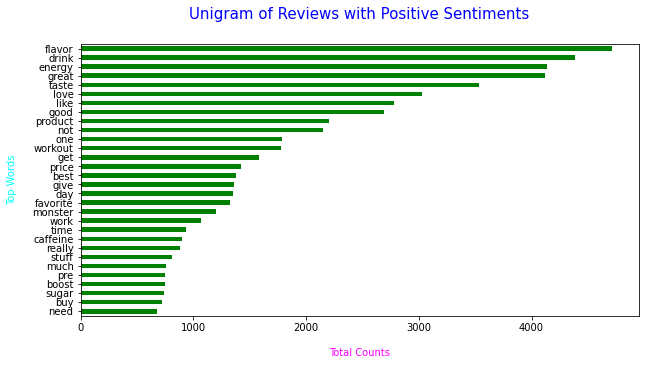

In [23]:
# Finding Unigram
words = Gram_Analysis(Positive["Text"], 1, 30)
Unigram = pd.DataFrame(words, columns = ["Words", "Counts"])

# Visualization
Unigram.groupby("Words").sum()["Counts"].sort_values().plot(kind = "barh", color = "green", figsize = (10, 5))
plt.title("Unigram of Reviews with Positive Sentiments", loc = "center", fontsize = 15, color = "blue", pad = 25)
plt.xlabel("Total Counts", color = "magenta", fontsize = 10, labelpad = 15)
plt.xticks(rotation = 0)
plt.ylabel("Top Words", color = "cyan", fontsize = 10, labelpad = 15)
plt.show()

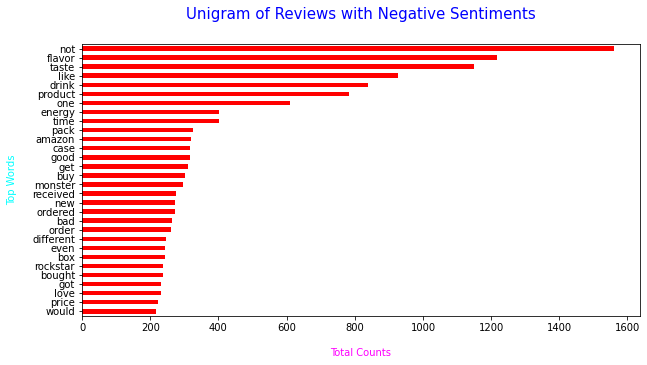

In [24]:
words = Gram_Analysis(Negative["Text"], 1, 30)
Unigram = pd.DataFrame(words, columns = ["Words", "Counts"])

# Visualization
Unigram.groupby("Words").sum()["Counts"].sort_values().plot(kind = "barh", color = "red", figsize = (10, 5))
plt.title("Unigram of Reviews with Negative Sentiments", loc = "center", fontsize = 15, color = "blue", pad = 25)
plt.xlabel("Total Counts", color = "magenta", fontsize = 10, labelpad = 15)
plt.xticks(rotation = 0)
plt.ylabel("Top Words", color = "cyan", fontsize = 10, labelpad = 15)
plt.show()

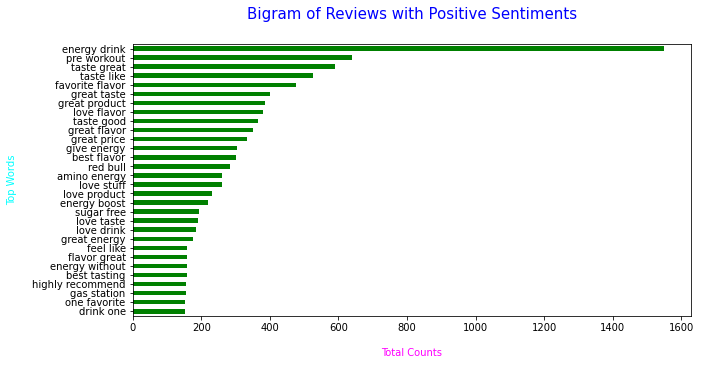

In [25]:
words = Gram_Analysis(Positive["Text"], 2, 30)
Bigram = pd.DataFrame(words, columns = ["Words", "Counts"])

# Visualization
Bigram.groupby("Words").sum()["Counts"].sort_values().plot(kind = "barh", color = "green", figsize = (10, 5))
plt.title("Bigram of Reviews with Positive Sentiments", loc = "center", fontsize = 15, color = "blue", pad = 25)
plt.xlabel("Total Counts", color = "magenta", fontsize = 10, labelpad = 15)
plt.xticks(rotation = 0)
plt.ylabel("Top Words", color = "cyan", fontsize = 10, labelpad = 15)
plt.show()

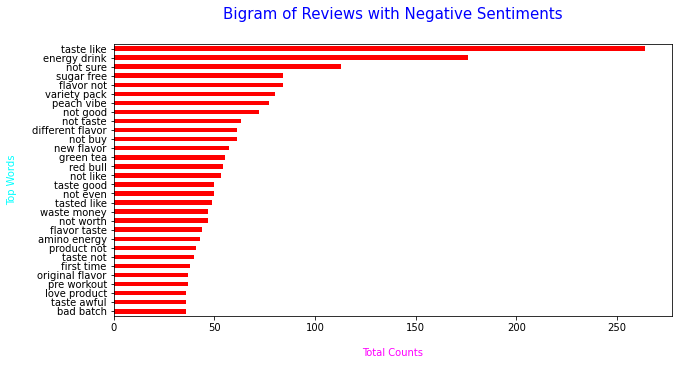

In [26]:
words = Gram_Analysis(Negative["Text"], 2, 30)
Bigram = pd.DataFrame(words, columns = ["Words", "Counts"])

# Visualization
Bigram.groupby("Words").sum()["Counts"].sort_values().plot(kind = "barh", color = "red", figsize = (10, 5))
plt.title("Bigram of Reviews with Negative Sentiments", loc = "center", fontsize = 15, color = "blue", pad = 25)
plt.xlabel("Total Counts", color = "magenta", fontsize = 10, labelpad = 15)
plt.xticks(rotation = 0)
plt.ylabel("Top Words", color = "cyan", fontsize = 10, labelpad = 15)
plt.show()

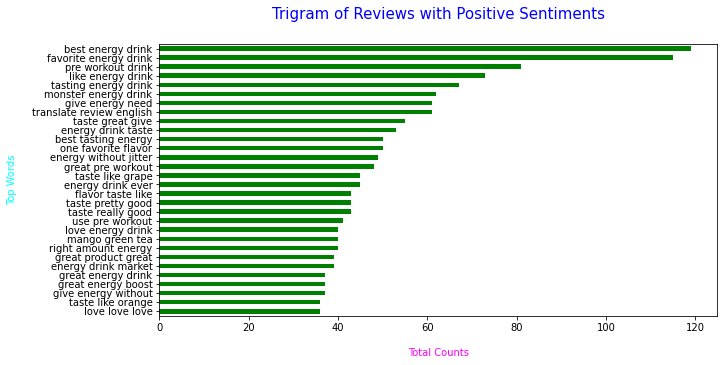

In [27]:
words = Gram_Analysis(Positive["Text"], 3, 30)
Trigram = pd.DataFrame(words, columns = ["Words", "Counts"])

# Visualization
Trigram.groupby("Words").sum()["Counts"].sort_values().plot(kind = "barh", color = "green", figsize = (10, 5))
plt.title("Trigram of Reviews with Positive Sentiments", loc = "center", fontsize = 15, color = "blue", pad = 25)
plt.xlabel("Total Counts", color = "magenta", fontsize = 10, labelpad = 15)
plt.xticks(rotation = 0)
plt.ylabel("Top Words", color = "cyan", fontsize = 10, labelpad = 15)
plt.show()

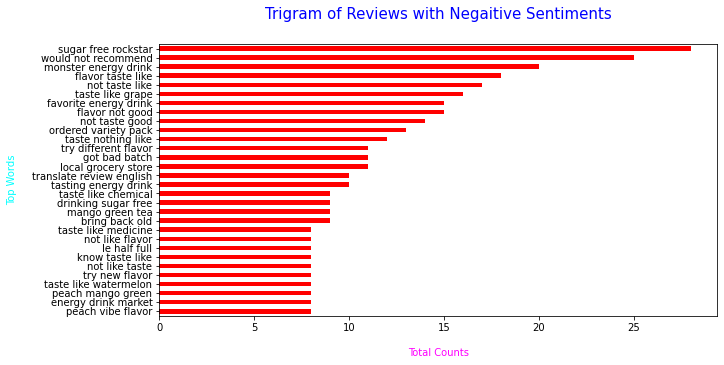

In [28]:
words = Gram_Analysis(Negative["Text"], 3, 30)
Trigram = pd.DataFrame(words, columns = ["Words", "Counts"])

# Visualization
Trigram.groupby("Words").sum()["Counts"].sort_values().plot(kind = "barh", color = "red", figsize = (10, 5))
plt.title("Trigram of Reviews with Negaitive Sentiments", loc = "center", fontsize = 15, color = "blue", pad = 25)
plt.xlabel("Total Counts", color = "magenta", fontsize = 10, labelpad = 15)
plt.xticks(rotation = 0)
plt.ylabel("Top Words", color = "cyan", fontsize = 10, labelpad = 15)
plt.show()

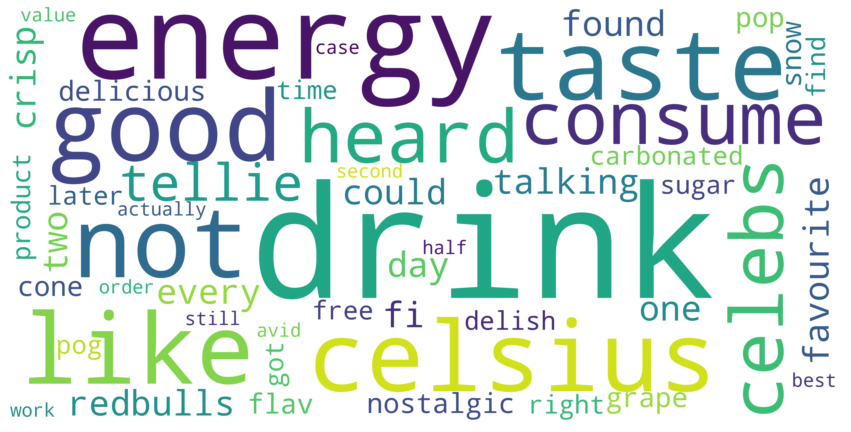

In [29]:
wordCloud = WordCloud(background_color='white',max_words = 50, width = 3000, height = 1500, stopwords = Stopwords).generate(str(Positive["Text"]))
plt.figure(figsize = (15, 15))
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

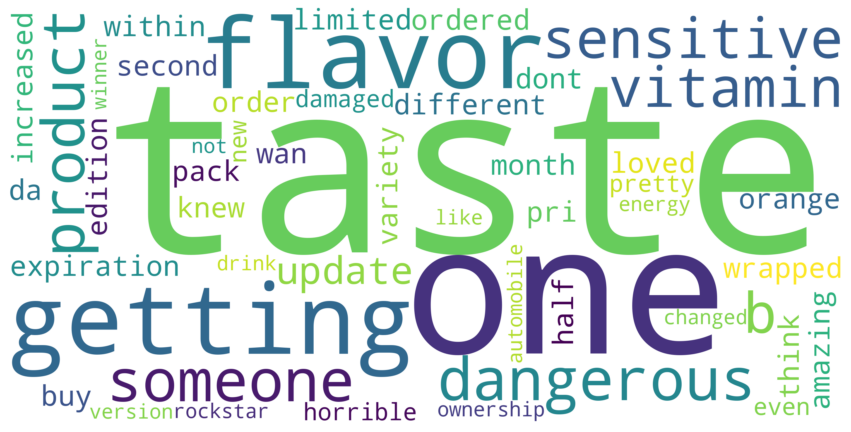

In [30]:
wordCloud = WordCloud(background_color='white',max_words = 50, width = 3000, height = 1500, stopwords = Stopwords).generate(str(Negative["Text"]))
plt.figure(figsize = (15, 15))
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

In [31]:
df.columns

Index(['ProfileName', 'Score', 'Summary', 'Time', 'Text', 'sentiment'], dtype='object')

In [32]:
Columns = ['ProfileName', 'Time']

In [33]:
df.drop(columns = Columns, axis = 1, inplace = True)

In [34]:
Encoder = LabelEncoder()
df["sentiment"] = Encoder.fit_transform(df["sentiment"])

In [35]:
df

,Score,Summary,Text,sentiment
0,5,The sparkling versions are fantastic,celsius energy drink energy drink consume like...,2
1,5,Replaces Adderall for ADD,heard celebs tellie talking drink could not fi...,2
2,1,Very dangerous drink,dangerous product someone sensitive b vitamin ...,0
3,5,I drink one or two Redbulls every day. Now ...,drink one two redbulls every day found celsius...,2
4,5,Great taste lots of kick!!!,favourite taste crisp nostalgic grape pop flav...,2
...,...,...,...,...
17489,5,Love this sugar free POG!!!! Yum!!,sugar free pog drink find delish,2
17490,5,Got it Right,got right product time,2
17491,5,"It's rock star, Not as good as red bull to get...",good can later actually work,2
17492,5,Still cheaper than the store,still best value half case avid energy drink d...,2


In [36]:
cv=CountVectorizer(max_features=10000)

In [37]:
X = cv.fit_transform(df["Text"])
y = df["sentiment"]

In [38]:
Balancer = SMOTE(random_state = 101)
X_final, y_final = Balancer.fit_resample(X, y)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size = 0.25, random_state = 101)

In [40]:
DTree = DecisionTreeClassifier()
LR = LogisticRegression()
RForest = RandomForestClassifier()
Bayes = BernoulliNB()
KNN = KNeighborsClassifier()

Models = [DTree, LR, RForest, Bayes, KNN]
Models_Dict = {0: "Decision Tree", 1: "Logistic Regression", 2: "Random Forest", 3: "Naive Bayes", 4: "K-Neighbors"}

for i, model in enumerate(Models):
    print("{} Test Accuracy: {}".format(Models_Dict[i], cross_val_score(model, X, y, cv = 10, scoring = "accuracy").mean()))

Decision Tree Test Accuracy: 0.7834133137302949


C:\Users\62451\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\62451\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Logistic Regression Test Accuracy: 0.8404015355713469
Random Forest Test Accuracy: 0.8475477252307441
Naive Bayes Test Accuracy: 0.79512965776362
K-Neighbors Test Accuracy: 0.8013599281221921


In [41]:
Classifier = RandomForestClassifier()
Classifier.fit(X_train, y_train)
Prediction = Classifier.predict(X_test)

In [42]:
accuracy_score(y_test, Prediction)

0.8068416396343262

In [43]:
ConfusionMatrix = confusion_matrix(y_test, Prediction)

In [44]:
def plot_cm(cm, classes, title, normalized = False, cmap = plt.cm.Blues):

  plt.imshow(cm, interpolation = "nearest", cmap = cmap)
  plt.title(title, pad = 20)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes)
  plt.yticks(tick_marks, classes)

  if normalized:
    cm = cm.astype('float') / cm.sum(axis = 1)[: np.newaxis]
    print("Normalized Confusion Matrix")
  else:
    print("Unnormalized Confusion Matrix")
  
  threshold = cm.max() / 2
  for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
      plt.text(j, i, cm[i, j], horizontalalignment = "center", color = "white" if cm[i, j] > threshold else "black")

  plt.tight_layout()
  plt.xlabel("Predicted Label", labelpad = 20)
  plt.ylabel("Real Label", labelpad = 20)

Unnormalized Confusion Matrix


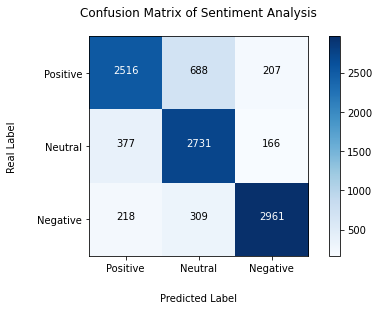

In [45]:
plot_cm(ConfusionMatrix, classes = ["Positive", "Neutral", "Negative"], title = "Confusion Matrix of Sentiment Analysis")

In [46]:
print(classification_report(y_test, Prediction))

              precision    recall  f1-score   support

           0       0.81      0.74      0.77      3411
           1       0.73      0.83      0.78      3274
           2       0.89      0.85      0.87      3488

    accuracy                           0.81     10173
   macro avg       0.81      0.81      0.81     10173
weighted avg       0.81      0.81      0.81     10173



In [47]:
RForest.fit(X_train,y_train)
y_proba = RForest.predict_proba(X_test)[:,1]
y_test_bin = label_binarize(y_test, classes=[0,1,2])
n_classes = y_test_bin.shape[1]
y_score = RForest.predict_proba(X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()

In [48]:
for i in range(len(y)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

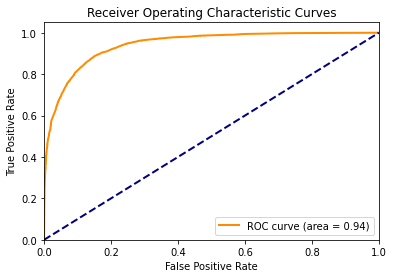

AUC for Class 1: 0.9302616168387485
AUC for Class 2: 0.9288118035751554
AUC for Class 3: 0.9672129853910918


In [49]:
plt.plot(fpr[2], tpr[2], color='darkorange', lw=2,label="ROC curve (area = %0.2f)" % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curves')
plt.legend(loc="lower right")
plt.show()
for i in range(n_classes):
  fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
  print('AUC for Class {}: {}'.format(i+1, auc(fpr[i], tpr[i])))

In [50]:
TF_IDF = TfidfVectorizer(max_features = 10000)
X = TF_IDF.fit_transform(df["Text"])

In [51]:
Balancer = SMOTE(random_state = 101)
X_final, y_final = Balancer.fit_resample(X, y)

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size = 0.25, random_state = 101)

In [53]:
DTree = DecisionTreeClassifier()
LR = LogisticRegression()
RForest = RandomForestClassifier()
Bayes = BernoulliNB()
KNN = KNeighborsClassifier()

Models = [DTree, LR, RForest, Bayes, KNN]
Models_Dict = {0: "Decision Tree", 1: "Logistic Regression", 2: "Random Forest", 3: "Naive Bayes", 4: "K-Neighbors"}

for i, model in enumerate(Models):
    print("{} Test Accuracy: {}".format(Models_Dict[i], cross_val_score(model, X, y, cv = 10, scoring = "accuracy").mean()))

Decision Tree Test Accuracy: 0.7887298864657356


C:\Users\62451\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\62451\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Logistic Regression Test Accuracy: 0.8548063383157724
Random Forest Test Accuracy: 0.8460046720575022
Naive Bayes Test Accuracy: 0.79512965776362
K-Neighbors Test Accuracy: 0.7823828800130688


In [54]:
Param = {"C": np.logspace(-4, 4, 50), "penalty": ['l1', 'l2']}
grid_search = GridSearchCV(estimator = LogisticRegression(random_state = 101), param_grid = Param, scoring = "accuracy", cv = 10, verbose = 0, n_jobs = -1)

grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

C:\Users\62451\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
500 fits failed out of a total of 1000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
500 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\62451\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\62451\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\62451\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(


Best Accuracy: 90.58 %
Best Parameters: {'C': 1526.4179671752302, 'penalty': 'l2'}


C:\Users\62451\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [55]:
Classifier = LogisticRegression(random_state = 101, C = 1526.4179671752302, penalty = 'l2')
Classifier.fit(X_train, y_train)

Prediction = Classifier.predict(X_test)
accuracy_score(y_test, Prediction)

C:\Users\62451\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Unnormalized Confusion Matrix
              precision    recall  f1-score   support

           0       0.91      0.91      0.91      3411
           1       0.88      0.94      0.91      3274
           2       0.92      0.87      0.89      3488

    accuracy                           0.90     10173
   macro avg       0.90      0.91      0.90     10173
weighted avg       0.91      0.90      0.90     10173



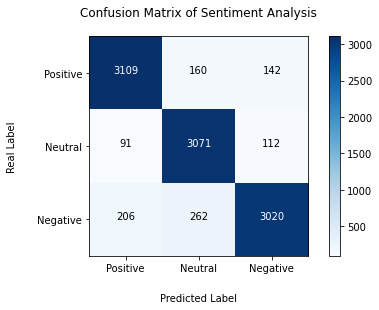

In [57]:
ConfusionMatrix = confusion_matrix(y_test, Prediction)
def plot_cm(cm, classes, title, normalized = False, cmap = plt.cm.Blues):

  plt.imshow(cm, interpolation = "nearest", cmap = cmap)
  plt.title(title, pad = 20)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes)
  plt.yticks(tick_marks, classes)

  if normalized:
    cm = cm.astype('float') / cm.sum(axis = 1)[: np.newaxis]
    print("Normalized Confusion Matrix")
  else:
    print("Unnormalized Confusion Matrix")
  
  threshold = cm.max() / 2
  for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
      plt.text(j, i, cm[i, j], horizontalalignment = "center", color = "white" if cm[i, j] > threshold else "black")

  plt.tight_layout()
  plt.xlabel("Predicted Label", labelpad = 20)
  plt.ylabel("Real Label", labelpad = 20)
plot_cm(ConfusionMatrix, classes = ["Positive", "Neutral", "Negative"], title = "Confusion Matrix of Sentiment Analysis")
print(classification_report(y_test, Prediction))

In [58]:
y_score = LR.fit(X_train, y_train).decision_function(X_test)

C:\Users\62451\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


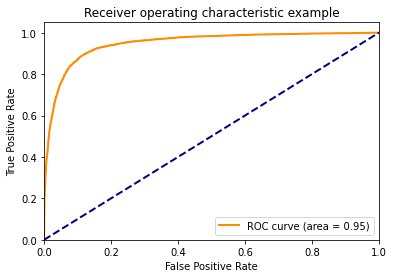

AUC for Class 1: 0.9565880728797198
AUC for Class 2: 0.9360182121602177
AUC for Class 3: 0.9527470828501438


In [59]:
Y = label_binarize(y_test, classes=[0,1,2])
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(y)):
    fpr[i], tpr[i], _ = roc_curve(Y.ravel(), y_score.ravel())
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(Y.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
plt.figure()
lw = 2
plt.plot(
    fpr[2],
    tpr[2],
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc[2],
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()
for i in range(Y.shape[1]):
  fpr[i], tpr[i], _ = roc_curve(Y[:, i], y_score[:, i])
  print('AUC for Class {}: {}'.format(i+1, auc(fpr[i], tpr[i])))

In [60]:
w = TF_IDF.get_feature_names()
coef = LR.coef_.tolist()[0]
coeff_df = pd.DataFrame({'Word' : w, 'Coefficient' : coef})
coeff_df = coeff_df.sort_values(['Coefficient', 'Word'], ascending=[0, 1])
print('')
print('-Top 20 negative-')
print(coeff_df.head(20).to_string(index=False))
print('')
print('-Top 20 positive-')        
print(coeff_df.tail(20).to_string(index=False))


-Top 20 negative-
      Word  Coefficient
disgusting     4.756976
     worst     4.312277
    refund     4.020049
     waste     3.984353
       not     3.503352
    ruined     3.467887
      flat     3.321865
   changed     3.109132
       rip     3.038762
  horrible     3.023503
     nasty     2.998526
    return     2.960416
  terrible     2.857343
   expired     2.760624
      fake     2.709481
  medicine     2.709333
     avoid     2.690492
      look     2.664807
     awful     2.620132
     pepsi     2.514595

-Top 20 positive-
     Word  Coefficient
      bit    -2.266541
  perfect    -2.324749
    loved    -2.342893
   sugary    -2.394069
      fan    -2.444302
  cheaper    -2.448335
excellent    -2.468432
 quantity    -2.517025
    found    -2.640956
 favorite    -2.769348
   always    -2.770200
   little    -2.773839
     work    -2.786289
     nice    -2.833604
     good    -2.884583
     life    -3.020949
  amazing    -3.141958
     love    -4.198183
     best    -4.73837

C:\Users\62451\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [61]:
# Defining our vectorizer with total words of 5000 and with bigram model
TF_IDF_Ngram = TfidfVectorizer(max_features = 10000, ngram_range = (1, 4))

# Fitting and transforming our reviews into a matrix of weighed words
# This will be our independent features
X = TF_IDF_Ngram.fit_transform(df["Text"])

# Check our matrix shape
X.shape

(17494, 10000)

In [62]:
y = df["sentiment"]

In [63]:
Counter(y)

Counter({2: 13564, 0: 2932, 1: 998})

In [64]:
Balancer = SMOTE(random_state = 42)
X_final, y_final = Balancer.fit_resample(X, y)

In [65]:
Counter(y_final)

Counter({2: 13564, 0: 13564, 1: 13564})

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size = 0.25, random_state = 101)

In [68]:
DTree = DecisionTreeClassifier()
LR = LogisticRegression()
RForest = RandomForestClassifier()
Bayes = BernoulliNB()
KNN = KNeighborsClassifier()

Models = [DTree, LR, RForest, Bayes, KNN]
Models_Dict = {0: "Decision Tree", 1: "Logistic Regression", 2: "Random Forest", 3: "Naive Bayes", 4: "K-Neighbors"}

for i, model in enumerate(Models):
    print("{} Test Accuracy: {}".format(Models_Dict[i], cross_val_score(model, X, y, cv = 10, scoring = "accuracy").mean()))

Decision Tree Test Accuracy: 0.7902156987666422


C:\Users\62451\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\62451\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Logistic Regression Test Accuracy: 0.8566930000816793
Random Forest Test Accuracy: 0.8448036919055786
Naive Bayes Test Accuracy: 0.7865554520950747
K-Neighbors Test Accuracy: 0.7794671894143592


In [69]:
Param = {"C": np.logspace(-4, 4, 50), "penalty": ['l1', 'l2']}
grid_search = GridSearchCV(estimator = LogisticRegression(random_state = 101), param_grid = Param, scoring = "accuracy", cv = 10, verbose = 0, n_jobs = -1)

grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

C:\Users\62451\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
500 fits failed out of a total of 1000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
500 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\62451\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\62451\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\62451\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(


Best Accuracy: 94.67 %
Best Parameters: {'C': 3237.45754281764, 'penalty': 'l2'}


C:\Users\62451\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [70]:
Classifier = LogisticRegression(random_state = 101, C = 3237.45754281764, penalty = 'l2')
Classifier.fit(X_train, y_train)

Prediction = Classifier.predict(X_test)

C:\Users\62451\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [71]:
accuracy_score(y_test, Prediction)

0.9512434876634228

In [72]:
ConfusionMatrix = confusion_matrix(y_test, Prediction)

In [73]:
# Plotting Function for Confusion Matrix
def plot_cm(cm, classes, title, normalized = False, cmap = plt.cm.Blues):

  plt.imshow(cm, interpolation = "nearest", cmap = cmap)
  plt.title(title, pad = 20)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes)
  plt.yticks(tick_marks, classes)

  if normalized:
    cm = cm.astype('float') / cm.sum(axis = 1)[: np.newaxis]
    print("Normalized Confusion Matrix")
  else:
    print("Unnormalized Confusion Matrix")
  
  threshold = cm.max() / 2
  for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
      plt.text(j, i, cm[i, j], horizontalalignment = "center", color = "white" if cm[i, j] > threshold else "black")

  plt.tight_layout()
  plt.xlabel("Predicted Label", labelpad = 20)
  plt.ylabel("Real Label", labelpad = 20)

Unnormalized Confusion Matrix


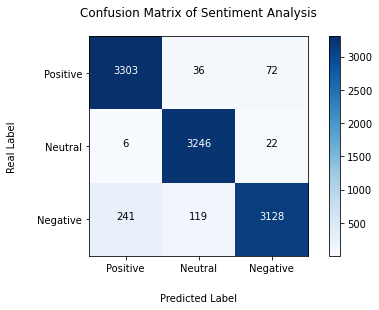

In [74]:
plot_cm(ConfusionMatrix, classes = ["Positive", "Neutral", "Negative"], title = "Confusion Matrix of Sentiment Analysis")

In [75]:
print(classification_report(y_test, Prediction))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      3411
           1       0.95      0.99      0.97      3274
           2       0.97      0.90      0.93      3488

    accuracy                           0.95     10173
   macro avg       0.95      0.95      0.95     10173
weighted avg       0.95      0.95      0.95     10173



In [76]:
from sklearn.metrics import roc_curve, auc

In [77]:
y_train

16207    2
11248    1
14514    2
10748    0
7701     2
        ..
12363    2
5695     2
8006     2
17745    0
17931    0
Name: sentiment, Length: 30519, dtype: int32

In [78]:
y_score = LR.fit(X_train, y_train).decision_function(X_test)

C:\Users\62451\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [79]:
y.shape

(17494,)

In [80]:
from sklearn.preprocessing import label_binarize

In [81]:
Y = label_binarize(y_test, classes=[0,1,2])
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(y)):
    fpr[i], tpr[i], _ = roc_curve(Y.ravel(), y_score.ravel())
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(Y.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

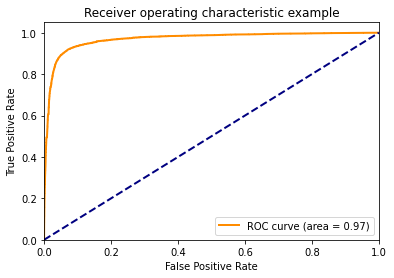

AUC for Class 1: 0.9719964490199992
AUC for Class 2: 0.9776484830475285
AUC for Class 3: 0.9576078770765716


In [82]:
Y = label_binarize(y_test, classes=[0,1,2])
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(y)):
    fpr[i], tpr[i], _ = roc_curve(Y.ravel(), y_score.ravel())
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(Y.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
plt.figure()
lw = 2
plt.plot(
    fpr[2],
    tpr[2],
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc[2],
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()
for i in range(Y.shape[1]):
  fpr[i], tpr[i], _ = roc_curve(Y[:, i], y_score[:, i])
  print('AUC for Class {}: {}'.format(i+1, auc(fpr[i], tpr[i])))

In [83]:
w = TF_IDF_Ngram.get_feature_names()
coef = LR.coef_.tolist()[0]
coeff_df = pd.DataFrame({'Word' : w, 'Coefficient' : coef})
coeff_df = coeff_df.sort_values(['Coefficient', 'Word'], ascending=[0, 1])
print('')
print('-Top 20 negative-')
print(coeff_df.head(20).to_string(index=False))
print('')
print('-Top 20 positive-')        
print(coeff_df.tail(20).to_string(index=False))


-Top 20 negative-
           Word  Coefficient
     disgusting     3.862072
          worst     3.558930
         refund     3.301459
       horrible     3.226812
       medicine     2.672422
         ruined     2.652879
          awful     2.647528
          waste     2.613142
           flat     2.600702
          pepsi     2.593779
        expired     2.427050
           look     2.296904
       terrible     2.286644
         return     2.278263
        changed     2.271803
            not     2.265322
          avoid     2.250221
  not recommend     2.245206
arrived damaged     2.214617
      not taste     2.128450

-Top 20 positive-
     Word  Coefficient
   better    -2.442016
   always    -2.519413
   little    -2.550733
 delivery    -2.563485
     okay    -2.670145
  perfect    -2.693083
     give    -2.705060
  awesome    -2.733492
excellent    -2.765427
  not bad    -2.860404
  amazing    -2.905252
  cheaper    -3.079979
    tasty    -3.134076
     nice    -3.217829
     wor

C:\Users\62451\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
